In [98]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure import bandstructure as bs
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
with MPRester("8dT4ZwJiqOtEkr83gIsD") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-867339")
    bands     = m.get_bandstructure_by_material_id("mp-867339") 

MPRestError: REST query returned with error status code 503. Content: b'<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>503 Service Unavailable</title>\n</head><body>\n<h1>Service Unavailable</h1>\n<p>The server is temporarily unable to service your\nrequest due to maintenance downtime or capacity\nproblems. Please try again later.</p>\n<hr>\n<address>Apache/2.4.41 (Ubuntu) Server at legacy.materialsproject.org Port 80</address>\n</body></html>\n'

## Bande interdite : ##


{'direct': True, 'energy': 0.30099999999999993, 'transition': '\\Gamma-\\Gamma'}

Bande directe ? :  True
Energie :  0.30099999999999993 eV
Transition :  \Gamma-\Gamma


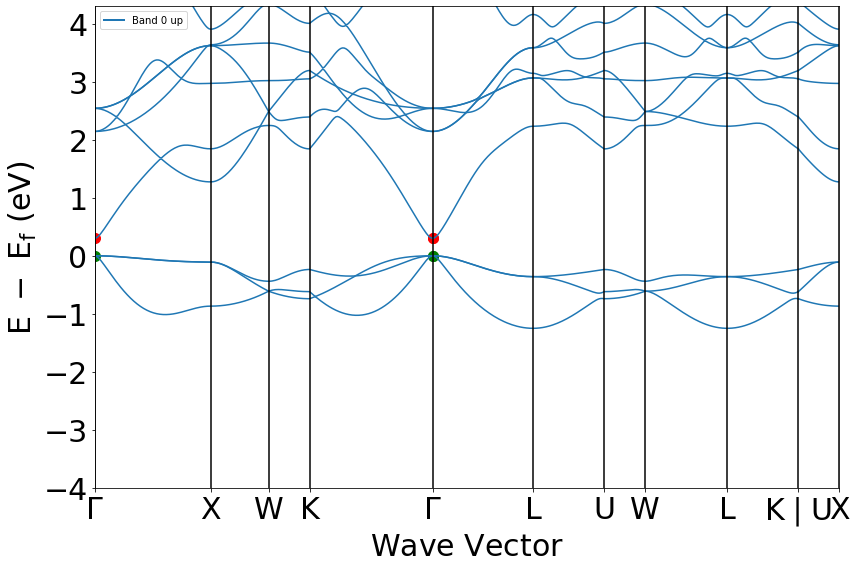

In [99]:
bplot = plotter.BSPlotter(bands)
bplot.get_plot(vbm_cbm_marker = True)

bandgap = bands.get_band_gap()
print(bandgap)
print("")
print("Bande directe ? : ", bandgap['direct'])
print("Energie : ", bandgap['energy'], 'eV')
print("Transition : ", bandgap['transition'])

## Direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion : ##

In [100]:
data = bplot.bs_plot_data()['distances']
energy = bplot.bs_plot_data()['energy']

# dernière bande de valence    
vbm = bands.get_vbm()
print("L'index de la première bande de valence est :",vbm['band_index'])

# première bande de conduction   
cbm = bands.get_cbm()
print("L'index de la dernière bande de conduction est :",cbm['band_index'])

# pentes
slope_val  = np.empty_like(data, dtype=object)
slope_cond = np.empty_like(data, dtype=object)

for i in range(len(data)):
    slope_val[i] = abs((energy['1'][i][15][0] - energy['1'][i][15][-1])/(data[i][-1]-data[i][0]))
    slope_cond[i] = abs((energy['1'][i][16][0] - energy['1'][i][16][-1])/(data[i][-1]-data[i][0]))
print(slope_val)

    
# maximas et minimas
max_val = np.argmax(slope_val)
min_val = np.argmin(slope_val)
max_cond = np.argmax(slope_cond)
min_cond = np.argmin(slope_cond)

L'index de la première bande de valence est : defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14, 15]})
L'index de la dernière bande de conduction est : defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})
[0.15358911571449188 0.9397042015064089 0.8158341421218006
 0.31584130174006425 0.589744238177238 0.2869711182191404
 0.8158341421217918 0.15939279253068467 0.28697111821913446
 0.5131082842675428]


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


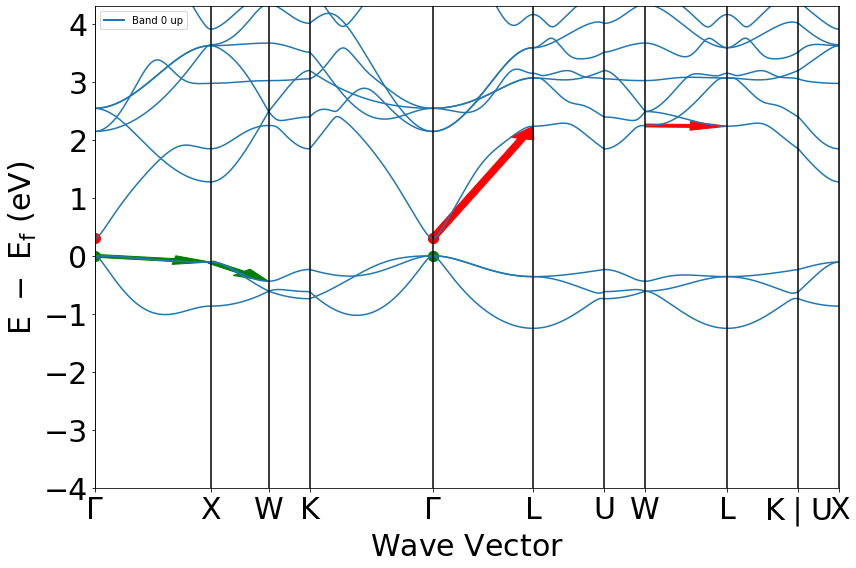

In [101]:
# flèches représentant les pentes maximales et minimales des bandes de valence et de conduction

bplot.get_plot(vbm_cbm_marker=True)
# Flèche pour la plus petite pente de la bande de valence
plt.arrow(data[min_val][0],energy['1'][min_val][15][0],data[min_val][-1]-data[min_val][0],energy['1'][min_val][15][-1]-energy['1'][min_val][15][0],width = 0.05,length_includes_head=True,color='green') 
# Flèche pour la plus grande pente de la bande de valence
plt.arrow(data[max_val][0],energy['1'][max_val][15][0],data[max_val][-1]-data[max_val][0],energy['1'][max_val][15][-1]-energy['1'][max_val][15][0],width = 0.05,length_includes_head=True,color='green') 
#Flèche pour la plus petite pente de la bande de conduction
plt.arrow(data[min_cond][0],energy['1'][min_cond][16][0],data[min_cond][-1]-data[min_cond][0],energy['1'][min_cond][16][-1]-energy['1'][min_cond][16][0],width = 0.05,length_includes_head=True,color='red')
#Flèche pour la plus grande pente de la bande de conduction
plt.arrow(data[max_cond][0],energy['1'][max_cond][16][0],data[max_cond][-1]-data[max_cond][0],energy['1'][max_cond][16][-1]-energy['1'][max_cond][16][0],width = 0.05,length_includes_head=True,color='red')  
plt.show()

## Masse effective : ##

In [102]:
h = 6.58212e-16 

# Calcul de la masse effective pour le minimum de bande de conduction
e_cond = cbm['energy']
k_cond = cbm['kpoint'].cart_coords
m_cond = (h**2)/(2*e_cond)*(k_cond[0]**2+k_cond[1]**2+k_cond[2]**2)
print("La masse effective à la base de la bande de conduction en supposant une dispersion parabolique vaut :", mc, '[kg]')

# Calcul de la masse effective pour le maximum de bande de valence
e_val = vbm['energy']
k_val = vbm['kpoint'].cart_coords
m_val = (h**2)/(2*e_val)*(k_val[0]**2+k_val[1]**2+k_val[2]**2)
print("La masse effective à la base de la bande de conduction en supposant une dispersion parabolique vaut :", mv, '[kg]')

La masse effective à la base de la bande de conduction en supposant une dispersion parabolique vaut : 0.0 [kg]
La masse effective à la base de la bande de conduction en supposant une dispersion parabolique vaut : 0.0 [kg]
